In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

IPythonConsole.ipython_useSVG = False
DrawingOptions.includeAtomNumbers=True

In [2]:
from molpher.core import ExplorationTree as ETree
from molpher.core import MolpherMol

captopril = MolpherMol("captopril.sdf")
tree = ETree.create(source=captopril)

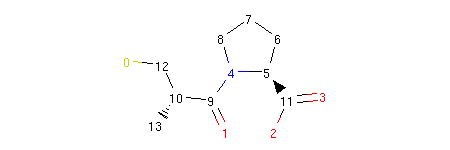

In [3]:
tree.leaves[0].asRDMol()

In [4]:
print('Source: ', tree.params['source'])

Source:  CC(CS)C(=O)N1CCCC1C(=O)O


In [5]:
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': None,
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 100000.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 5}

In [6]:
tree.params = {
    'non_producing_survive' : 2
    , 'weight_max' : 500.0
}
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': None,
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 500.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 2}

(<molpher.core.MolpherMol.MolpherMol at 0x7fe8d97a1930>,)


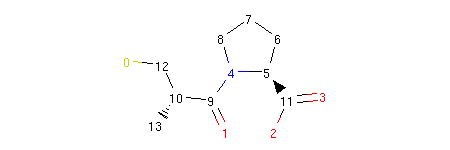

In [7]:
print(tree.leaves) # show the current leaves of the tree (only the source so far)
tree.leaves[0].asRDMol()

In [8]:
tree.generateMorphs()
print(len(tree.candidates))

27


In [9]:
{x.dist_to_target for x in tree.candidates}

{1.7976931348623157e+308}

In [10]:
def sascore_as_obj(morph, operator):
    morph.dist_to_target = morph.sascore
    
tree.generateMorphs([sascore_as_obj])
print(len(tree.candidates))
[x.dist_to_target for x in tree.candidates]

26


[4.229893284736971,
 3.8501001628456333,
 4.210858601671017,
 3.9938638051851627,
 3.9784865729838823,
 4.161464339486345,
 4.190517829244547,
 3.8871106534610247,
 4.208420345343031,
 3.804751376555311,
 4.301058484023958,
 4.07707254155531,
 4.124693467161213,
 4.336516757110866,
 3.8893996483733346,
 3.9220880467166013,
 3.3191105796423788,
 4.282135385494547,
 4.317625951403638,
 3.916140148729842,
 4.1324587487298405,
 4.1396331252004295,
 4.097655547161213,
 3.9366697951036973,
 4.270244072615759,
 3.6068233640553107]

In [11]:
tree.sortMorphs()

[
    (x.smiles, x.dist_to_target)
    for idx,x in enumerate(tree.candidates)
]

[('CC(C)C(=O)N1CCCC1C(=O)O', 3.3191105796423788),
 ('CC(CN)C(=O)N1CCCC1C(=O)O', 3.6068233640553107),
 ('CC(CS)C(=O)N1CCCC1C(=O)O', 3.804751376555311),
 ('CSC(C)C(=O)N1CCCC1C(=O)O', 3.8501001628456333),
 ('O=C(O)C1CCCN1C(=O)CCS', 3.8871106534610247),
 ('CCC(CS)C(=O)N1CCCC1C(=O)O', 3.8893996483733346),
 ('CSCC(C)C(=O)N1CCCC1C(=O)O', 3.916140148729842),
 ('O=C(O)C1CCCN1C(=O)CCCS', 3.9220880467166013),
 ('CC(S)CC(=O)N1CCCC1C(=O)O', 3.9366697951036973),
 ('O=C(O)C1CCCN1C(=O)C1CSC1', 3.9784865729838823),
 ('CC(S)C(=O)N1CCCC1C(=O)O', 3.9938638051851627),
 ('CC(OS)C(=O)N1CCCC1C(=O)O', 4.07707254155531),
 ('O=C(O)C1CCCN1C(=O)C(CS)CS', 4.097655547161213),
 ('CC(C(=O)N1CCCC1C(=O)O)C(F)S', 4.124693467161213),
 ('CC(OCS)C(=O)N1CCCC1C(=O)O', 4.1324587487298405),
 ('COC(CS)C(=O)N1CCCC1C(=O)O', 4.1396331252004295),
 ('CC(C=S)C(=O)N1CCCC1C(=O)O', 4.161464339486345),
 ('O=C(O)C1CCCN1C(=O)C(CO)CS', 4.190517829244547),
 ('CC(CSCl)C(=O)N1CCCC1C(=O)O', 4.208420345343031),
 ('CC(SCS)C(=O)N1CCCC1C(=O)O', 4.21

In [12]:
# print the current candidates mask (all positions are on by default)
print("Old mask:", tree.candidates_mask)

# accept only the first ten morphs in the sorted list (those with the lowest distance to target)
new_mask = [True if idx < 10 else False for idx, x in enumerate(tree.candidates_mask)]

# save the new mask to the tree
tree.candidates_mask = new_mask

# show results
print("New mask:", tree.candidates_mask)
print("Molecules that passed the filter:")
[
    (x.smiles, x.dist_to_target)
    for idx,x in enumerate(tree.candidates)
    if tree.candidates_mask[idx] # get molecules that passed the filter only
]

Old mask: (True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True)
New mask: (True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False)
Molecules that passed the filter:


[('CC(C)C(=O)N1CCCC1C(=O)O', 3.3191105796423788),
 ('CC(CN)C(=O)N1CCCC1C(=O)O', 3.6068233640553107),
 ('CC(CS)C(=O)N1CCCC1C(=O)O', 3.804751376555311),
 ('CSC(C)C(=O)N1CCCC1C(=O)O', 3.8501001628456333),
 ('O=C(O)C1CCCN1C(=O)CCS', 3.8871106534610247),
 ('CCC(CS)C(=O)N1CCCC1C(=O)O', 3.8893996483733346),
 ('CSCC(C)C(=O)N1CCCC1C(=O)O', 3.916140148729842),
 ('O=C(O)C1CCCN1C(=O)CCCS', 3.9220880467166013),
 ('CC(S)CC(=O)N1CCCC1C(=O)O', 3.9366697951036973),
 ('O=C(O)C1CCCN1C(=O)C1CSC1', 3.9784865729838823)]

In [13]:
# get the number of generations before
print(tree.generation_count)

tree.extend() # connect the accepted morphs to the tree as new leaves

# get the number of generations after
print(tree.generation_count)

# grab the new leaves as a list sorted according to their distance from target
sorted(
    [
        (x.getSMILES(), x.getDistToTarget())
        for x in tree.leaves
    ], key=lambda item : item[1]
)

0
1


[('CC(C)C(=O)N1CCCC1C(=O)O', 3.3191105796423788),
 ('CC(CN)C(=O)N1CCCC1C(=O)O', 3.6068233640553107),
 ('CSC(C)C(=O)N1CCCC1C(=O)O', 3.8501001628456333),
 ('O=C(O)C1CCCN1C(=O)CCS', 3.8871106534610247),
 ('CCC(CS)C(=O)N1CCCC1C(=O)O', 3.8893996483733346),
 ('CSCC(C)C(=O)N1CCCC1C(=O)O', 3.916140148729842),
 ('O=C(O)C1CCCN1C(=O)CCCS', 3.9220880467166013),
 ('CC(S)CC(=O)N1CCCC1C(=O)O', 3.9366697951036973),
 ('O=C(O)C1CCCN1C(=O)C1CSC1', 3.9784865729838823)]

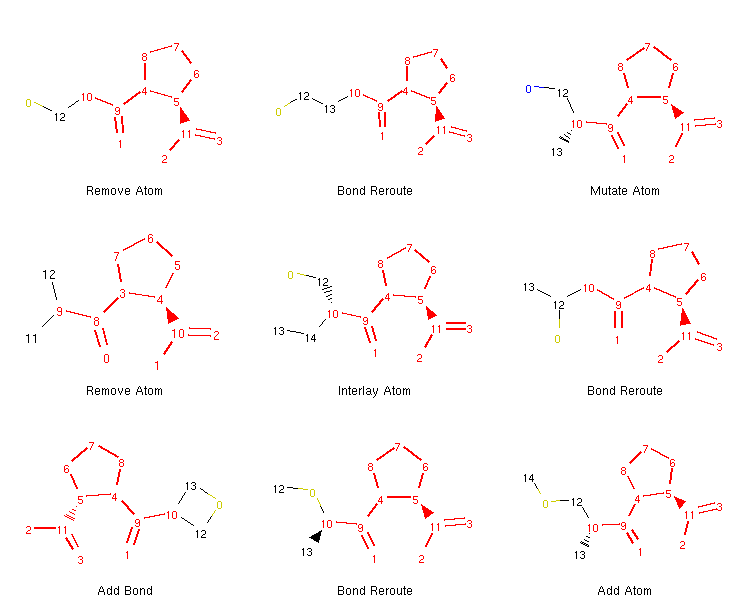

In [14]:
from rdkit.Chem.Draw import MolsToGridImage

def get_locked_atoms(mol):
    return [(idx, atm) for idx, atm in enumerate(mol.atoms) if atm.is_locked]

def show_mol_grid(mols):
    locked_atoms = [[y[0] for y in get_locked_atoms(x)] for x in mols]
    return MolsToGridImage(
        [x.asRDMol() for x in mols]
        , subImgSize=(250,200)
        , highlightAtomLists=locked_atoms
        , legends=[x.parent_operator for x in mols]
    )

show_mol_grid(tree.leaves)

In [15]:
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': None,
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 500.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 2}

In [16]:
class PenalizeKnown:
    
    def __init__(self, tree, penalty):
        self._tree = tree
        self._penalty = penalty
        
    def __call__(self, morph, operator):
        if self._tree.hasMol(morph):
            morph.dist_to_target += self._penalty

for iter_idx in range(1,10):
    tree.generateMorphs([sascore_as_obj, PenalizeKnown(tree, 10)])
    tree.sortMorphs()
    
    tree.candidates_mask = [
        True if idx < 50 and tree.candidates[idx].sascore < 6 
        else False 
        for idx, x in enumerate(tree.candidates_mask)
    ]
    
    tree.extend()

In [17]:
tree.generation_count

10

In [18]:
tree.mol_count

460

In [19]:
show_mol_grid(tree.leaves)

/home/sichom/projects/molpher-lib/deps/rdkit/rdkit/Chem/Draw/IPythonConsole.py:172: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn("Truncating the list of molecules to be displayed to %d. Change the maxMols value to display more."%(maxMols))


In [20]:
# set enalapril as target
tree.params = {
    'target' : MolpherMol("O=C(O)[CH]2N(C(=O)[CH](N[CH](C(=O)OCC)CCc1ccccc1)C)CCC2")
}
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': 'CCOC(=O)C(CCC1=CC=CC=C1)NC(C)C(=O)N1CCCC1C(=O)O',
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 500.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 2}

In [21]:
class FindClosest:
    
    def __init__(self):
        self.closest_mol = None
        self.closest_distance = None
        
    def __call__(self, morph):
        if not self.closest_mol or self.closest_distance > morph.dist_to_target:
            self.closest_mol = morph
            self.closest_distance = morph.dist_to_target         

closest_info = FindClosest()
while not tree.path_found:
    tree.generateMorphs()
    tree.sortMorphs()
    tree.filterMorphs()
    tree.extend()
    tree.prune()
    tree.traverse(closest_info)
    print('Generation #', tree.generation_count, sep='')
    print('Molecules in tree:', tree.mol_count)
    print('Closest molecule to target: {0} (Tanimoto distance: {1})'.format(
                    closest_info.closest_mol.getSMILES()
                    , closest_info.closest_distance
                ))

Generation #11
Molecules in tree: 418
Closest molecule to target: CCOC(=O)NC(C)C(=O)N1CCCC1C(=O)O (Tanimoto distance: 0.4576271186440678)
Generation #12
Molecules in tree: 496
Closest molecule to target: CCOC(=O)NC(C)C(=O)N1CCCC1C(=O)O (Tanimoto distance: 0.4576271186440678)
Generation #13
Molecules in tree: 579
Closest molecule to target: CCOC(C)C(C)NC(C)C(=O)N1CCCC1C(=O)O (Tanimoto distance: 0.44999999999999996)
Generation #14
Molecules in tree: 509
Closest molecule to target: CCOC(=O)C(Cl)NC(C)C(=O)N1CCCC1C(=O)O (Tanimoto distance: 0.4067796610169492)
Generation #15
Molecules in tree: 512
Closest molecule to target: CCOC(=O)C(C)NC(C)C(=O)N1CCCC1C(=O)O (Tanimoto distance: 0.375)
Generation #16
Molecules in tree: 473
Closest molecule to target: CCOC(=O)C(CC)NC(C)C(=O)N1CCCC1C(=O)O (Tanimoto distance: 0.3214285714285714)
Generation #17
Molecules in tree: 501
Closest molecule to target: CCCC(NC(C)C(=O)N1CCCC1C(=O)O)C(=O)OCC (Tanimoto distance: 0.2857142857142857)
Generation #18
Molecule

35


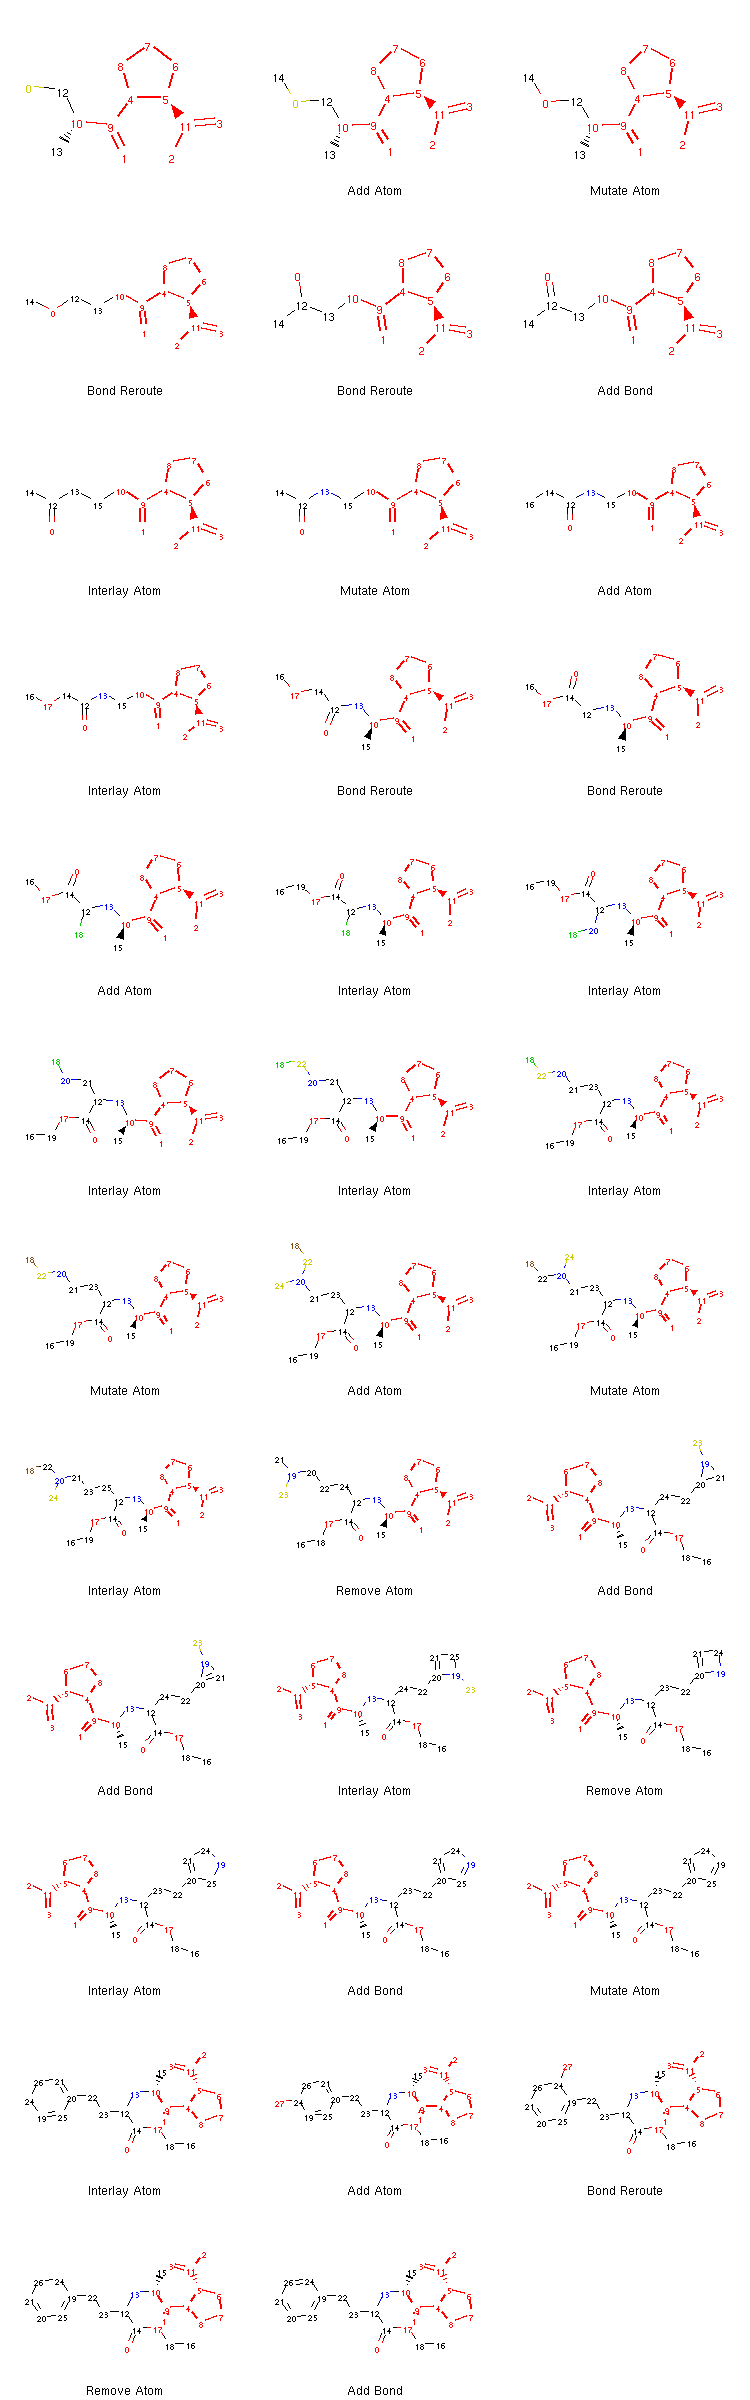

In [23]:
path = tree.fetchPathTo(tree.params['target'])

print(len(path))
show_mol_grid(path)